In [5]:
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
batch_size =64
train_dataset = datasets.FashionMNIST(root='./FashionMNIST/',
                               train=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root='./FashionMNIST/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [3]:
# Function to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.axis('off')
    plt.show()
classes = ('T-shirt/top', 'Trouser','Pullover','Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot')

torch.Size([64, 1, 28, 28])
torch.Size([64])


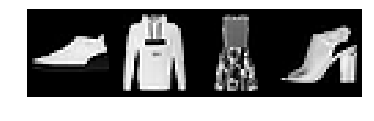

Sneaker Pullover Dress Sandal


In [6]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images[:4],nrow=4))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
#In original paper input size is 32x32 , but we have taken input size as 28x28

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,6,kernel_size=5)
        self.conv2 = nn.Conv2d(6,16,kernel_size=3)        
        self.pooling = nn.MaxPool2d(kernel_size=2,stride=2)  # original paper there is average pooling
        self.l1 = nn.Linear(400,120)
        self.l2 = nn.Linear(120,10)
        
        
    def forward(self,x):
        
        x = self.pooling(self.conv1(x))
        x = self.pooling(self.conv2(x))
        
        x = x.view(x.size(0),-1)
        x = self.l1(x)
        
        x = self.l2(x)
        
        return F.log_softmax(x)

In [11]:
model = LeNet()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [12]:
for epoch in range(10):
    for i ,(data,target) in enumerate(train_loader):
        data,target = Variable(data),Variable(target)
        optimizer.zero_grad()
        y_pred = model.forward(data)
        loss = criterion(y_pred,target)
        
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(data), len(train_loader.dataset),
                100. * i / len(train_loader), loss.item()))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.308614
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.472702
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.875373
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.610421
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.771768
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.679674
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.671654
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.681265
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.744454
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.545676
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.697384
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.613489
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.538601
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.657365
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.743274
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.539485
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.443585
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.525225
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.459159
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.539044
Train Epoch:

In [13]:
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    output = model.forward(data)
    # sum up batch loss
    test_loss += criterion(output, target).item()
    # get the index of the max
    pred = output.data.max(dim=1,keepdim=True)[1]
    
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.0061, Accuracy: 8626/10000 (86%)

